# Saved Energy Analysis

We will be using Recycling statistics to calculate energy saved every year from 2003 to 2020 based on five waste types, plastics, paper, glass, ferrous and non-ferrous metal.

## Loading Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import datetime

energy_saved = pd.read_csv('Data/energy_saved.csv')
waste_03_17 = pd.read_csv('Data/wastestats.csv')
waste_18_20 = pd.read_csv('Data/2018_2020_waste.csv')

In [2]:
energy_saved

The table gives the amount of energy saved in kilowatt hour (kWh) and the amount of crude oil (barrels) by recycling 1 metric tonne (1000 kilogram)  per waste type  \
0    1 barrel oil is approximately 159 litres of oil                                                                                                                    
1                                                NaN                                                                                                                    
2                                           material                                                                                                                    
3                                       energy_saved                                                                                                                    
4                                    crude_oil saved                                                                                                                    

   Unnamed: 1    Unnamed: 2     Unnamed: 3         Unnamed: 4  Unnamed: 5  
0         NaN           NaN            NaN                NaN         NaN  
1         NaN           NaN            NaN                NaN         NaN  
2     Plastic         Glass  Ferrous Metal  Non-Ferrous Metal       Paper  
3    5774 Kwh        42 Kwh        642 Kwh          14000 Kwh    4100 kWh  
4  16 barrels  0.12 barrels    1.8 barrels         40 barrels  11 barrels

In [3]:
waste_03_17

waste_type  waste_disposed_of_tonne  \
0                                      Food                   679900   
1                           Paper/Cardboard                   576000   
2                                  Plastics                   762700   
3                                       C&D                     9700   
4                       Horticultural waste                   111500   
..                                      ...                      ...   
220                          Ash and sludge                   214800   
221                                 Plastic                   763400   
222                         Textile/Leather                   141200   
223  Others (stones, ceramic, rubber, etc.)                   319300   
224                                   Total                  2980000   

     total_waste_recycled_tonne  total_waste_generated_tonne  recycling_rate  \
0                        111100                       791000            0.14   
1                        607100                      1183100            0.51   
2                         59500                       822200            0.07   
3                       1585700                      1595400            0.99   
4                        209000                       320500            0.65   
..                          ...                          ...             ...   
220                       28600                       243400            0.12   
221                       51800                       815200            0.06   
222                        9600                       150800            0.06   
223                        7100                       326400            0.02   
224                     4724300                      7704300            0.61   

     year  
0    2016  
1    2016  
2    2016  
3    2016  
4    2016  
..    ...  
220  2017  
221  2017  
222  2017  
223  2017  
224  2017  

[225 rows x 6 columns]

In [4]:
waste_18_20

Waste Type  Total Generated ('000 tonnes)  \
0                                       C&D                           1624   
1                             Ferrous metal                           1269   
2                           Paper/Cardboard                           1054   
3                                  Plastics                            949   
4                                      Food                            763   
5                                      Wood                            521   
6                       Horticultural waste                            320   
7                              Ash & Sludge                            240   
8                           Textile/Leather                            220   
9                                 Used slag                            181   
10                        Non-ferrous metal                            171   
11                                    Glass                             64   
12                              Scrap tyres                             32   
13  Others (stones, ceramics & rubber etc.)                            286   
14                                  Overall                           7695   
15                                      C&D                           1440   
16                            Ferrous metal                           1278   
17                          Paper/Cardboard                           1011   
18                                 Plastics                            930   
19                                     Food                           7440   
20                                     Wood                            438   
21                      Horticultural waste                            400   
22                             Ash & Sludge                            252   
23                          Textile/Leather                            168   
24                                Used slag                            129   
25                        Non-ferrous metal                            126   
26                                    Glass                             75   
27                              Scrap tyres                             33   
28  Others (stones, ceramics & rubber etc.)                            210   
29                                  Overall                           7234   
30                          Paper/Cardboard                           1144   
31                            Ferrous metal                            934   
32                                 Plastics                            868   
33                                      C&D                            825   
34                                     Food                            665   
35                      Horticultural waste                            313   
36                                     Wood                            304   
37                             Ash & Sludge                            228   
38                          Textile/Leather                            137   
39                                Used slag                            106   
40                        Non-ferrous metal                             75   
41                                    Glass                             66   
42                              Scrap tyres                             23   
43  Others (stones, ceramics & rubber etc.)                            193   
44                                  Overall                           5880   

    Total Recycled ('000 tonnes)  Year  
0                           1618  2018  
1                           1260  2018  
2                            586  2018  
3                             41  2018  
4                            126  2018  
5                            428  2018  
6                            227  2018  
7                             25  2018  
8                             14  2018  
9                            179  

## Data Cleaning

In [5]:
clean_waste_18_20 = waste_18_20.rename(
    columns={
        "Waste Type": "waste_type",
        "Total Generated ('000 tonnes)": "total_waste_generated_tonne",
        "Total Recycled ('000 tonnes)": "total_waste_recycled_tonne",
        "Year": "year",
    }
)
clean_waste_18_20["total_waste_generated_tonne"] = (
    clean_waste_18_20["total_waste_generated_tonne"] * 1000
)
clean_waste_18_20["total_waste_recycled_tonne"] = (
    clean_waste_18_20["total_waste_recycled_tonne"] * 1000
)

In [6]:
energy_saved

The table gives the amount of energy saved in kilowatt hour (kWh) and the amount of crude oil (barrels) by recycling 1 metric tonne (1000 kilogram)  per waste type  \
0    1 barrel oil is approximately 159 litres of oil                                                                                                                    
1                                                NaN                                                                                                                    
2                                           material                                                                                                                    
3                                       energy_saved                                                                                                                    
4                                    crude_oil saved                                                                                                                    

   Unnamed: 1    Unnamed: 2     Unnamed: 3         Unnamed: 4  Unnamed: 5  
0         NaN           NaN            NaN                NaN         NaN  
1         NaN           NaN            NaN                NaN         NaN  
2     Plastic         Glass  Ferrous Metal  Non-Ferrous Metal       Paper  
3    5774 Kwh        42 Kwh        642 Kwh          14000 Kwh    4100 kWh  
4  16 barrels  0.12 barrels    1.8 barrels         40 barrels  11 barrels

Transpose, Removed first two columns and first row, Resetting index, Renaming the columns. As we have three columns, material, energy_saved, and crude_oil_saved.

In [7]:
clean_energy_saved = (energy_saved.T.iloc[1:, 2:].reset_index(drop=True).rename(columns={2: "material", 3: "energy_saved", 4: "crude_oil_saved"}))
clean_energy_saved

material energy_saved crude_oil_saved
0            Plastic     5774 Kwh      16 barrels
1              Glass       42 Kwh    0.12 barrels
2      Ferrous Metal      642 Kwh     1.8 barrels
3  Non-Ferrous Metal    14000 Kwh      40 barrels
4              Paper     4100 kWh      11 barrels

In [8]:
clean_waste_03_17 = waste_03_17.loc[
    :,
    [
        "waste_type",
        "total_waste_generated_tonne",
        "total_waste_recycled_tonne",
        "recycling_rate",
        "year",
    ],
]

# Recycling rate
Let's add recycling rate into our DataFrame as it is missing and it will helpful for the further analysis.

In [9]:
clean_waste_18_20["recycling_rate"] = round(
    clean_waste_18_20["total_waste_recycled_tonne"]
    / clean_waste_18_20["total_waste_generated_tonne"],
    2,
)
clean_waste_18_20.head()

waste_type  total_waste_generated_tonne  total_waste_recycled_tonne  \
0              C&D                      1624000                     1618000   
1    Ferrous metal                      1269000                     1260000   
2  Paper/Cardboard                      1054000                      586000   
3         Plastics                       949000                       41000   
4             Food                       763000                      126000   

   year  recycling_rate  
0  2018            1.00  
1  2018            0.99  
2  2018            0.56  
3  2018            0.04  
4  2018            0.17

# Data Analysis

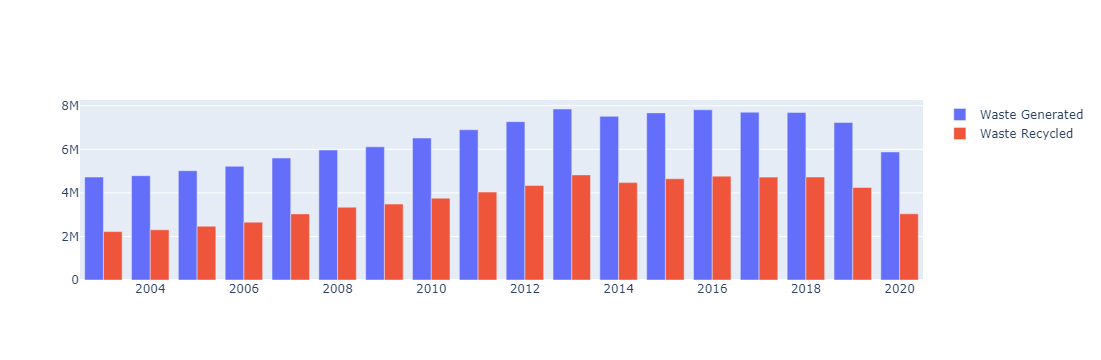

In [10]:
data = pd.concat([clean_waste_18_20, clean_waste_03_17]).sort_values(by="year")
overall = data[(data["waste_type"] == "Overall") | (data["waste_type"] == "Total")]


fig = go.Figure()

fig.add_trace(
    go.Bar(
        x=overall["year"],
        y=overall["total_waste_generated_tonne"],
        name="Waste Generated",
    )
)

fig.add_trace(
    go.Bar(
        x=overall["year"],
        y=overall["total_waste_recycled_tonne"],
        name="Waste Recycled",
    )
)

fig.show()

In [11]:
data['waste_type']=data['waste_type'].str.lower()

In [12]:
data['waste_type'].value_counts()

scrap tyres                                18
glass                                      18
used slag                                  18
textile/leather                            18
horticultural waste                        18
paper/cardboard                            18
plastics                                   17
total                                      15
ferrous metal                              14
non-ferrous metals                         12
others (stones, ceramics & rubber etc)     12
construction debris                        12
wood/timber                                11
food waste                                 11
sludge                                     11
food                                        7
wood                                        7
c&d                                         6
ash & sludge                                6
non-ferrous metal                           6
ferrous metals                              4
others (stones, ceramics & rubber 

In [13]:
data = data.replace('plastic','plastics') 
data = data.replace('overall','total')
data = data.replace('horticultural','horticultural waste')
data = data.replace('ferrous metal','ferrous metals')
data = data.replace('non-ferrous metal','non-ferrous metals')
data = data.replace(['construction& demolition','construction & demolition','c&d'],'construction debris')
data = data.replace(['others (stones, ceramic, rubber, ect)','others (stones, ceramics, etc.)','others',
               'others (stones, ceramic, rubber, etc.)','others (stones, ceramics & rubber etc.)'],'others (stones, ceramics & rubber etc)')
data = data.replace('food waste','food')
data = data.replace('wood','wood/timber')
data = data.replace(['ash & sludge','sludge'],'ash and sludge')

In [14]:
data['waste_type'].value_counts()

scrap tyres                               18
total                                     18
glass                                     18
ash and sludge                            18
used slag                                 18
non-ferrous metals                        18
ferrous metals                            18
others (stones, ceramics & rubber etc)    18
horticultural waste                       18
construction debris                       18
plastics                                  18
paper/cardboard                           18
food                                      18
wood/timber                               18
textile/leather                           18
Name: waste_type, dtype: int64

# Visualization

Initially, I attempted to comprehend the time series trend of the following: the percentage of "total waste generated_tonne" by "waste_type," the total waste generated, the total recycle created, and the recycling rate.

The quantity and time series trend of "energy_saving_amount" and "oil_saving_amount" by "waste_type" were then what I attempted to comprehend.

In order to get some understanding, I also attempted to comprehend the time series trend of the variables "waste generated," "recycle generated," and "recycling rate" by a certain "waste_type."

In [15]:
data = data.reset_index(drop=True)

In [16]:
data

waste_type  total_waste_generated_tonne  total_waste_recycled_tonne  \
0        scrap tyres                        14400                        6200   
1              total                      4728200                     2223200   
2              glass                        65500                        6200   
3     ash and sludge                        88500                           0   
4          used slag                       260300                      238500   
..               ...                          ...                         ...   
265         plastics                       868000                       36000   
266   ferrous metals                       934000                      930000   
267  paper/cardboard                      1144000                      432000   
268   ash and sludge                       228000                       16000   
269            total                      5880000                     3040000   

     year  recycling_rate  
0    2003            0.43  
1    2003            0.47  
2    2003            0.09  
3    2003            0.00  
4    2003            0.92  
..    ...             ...  
265  2020            0.04  
266  2020            1.00  
267  2020            0.38  
268  2020            0.07  
269  2020            0.52  

[270 rows x 5 columns]

In [17]:
data["waste_type"].value_counts()

scrap tyres                               18
total                                     18
glass                                     18
ash and sludge                            18
used slag                                 18
non-ferrous metals                        18
ferrous metals                            18
others (stones, ceramics & rubber etc)    18
horticultural waste                       18
construction debris                       18
plastics                                  18
paper/cardboard                           18
food                                      18
wood/timber                               18
textile/leather                           18
Name: waste_type, dtype: int64

In [18]:
df_total = data[data['waste_type']=='total']

In [19]:
df_total = df_total.sort_values('year')

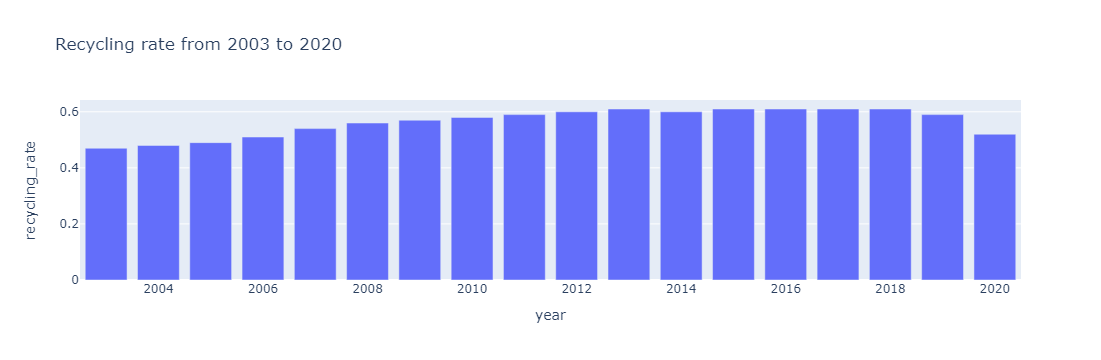

In [20]:
fig = px.bar(df_total, x="year", y="recycling_rate", title="Recycling rate from 2003 to 2020")
fig.show()

C:\Users\1004\Anaconda3\lib\site-packages\plotly\graph_objs\_deprecations.py:378: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




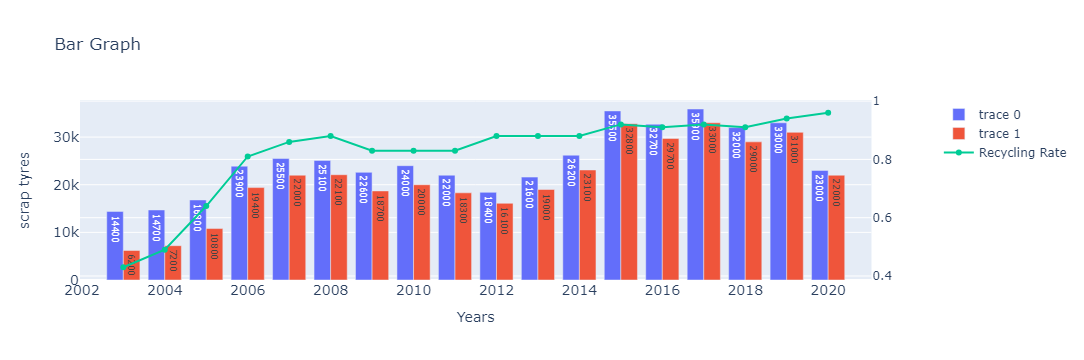

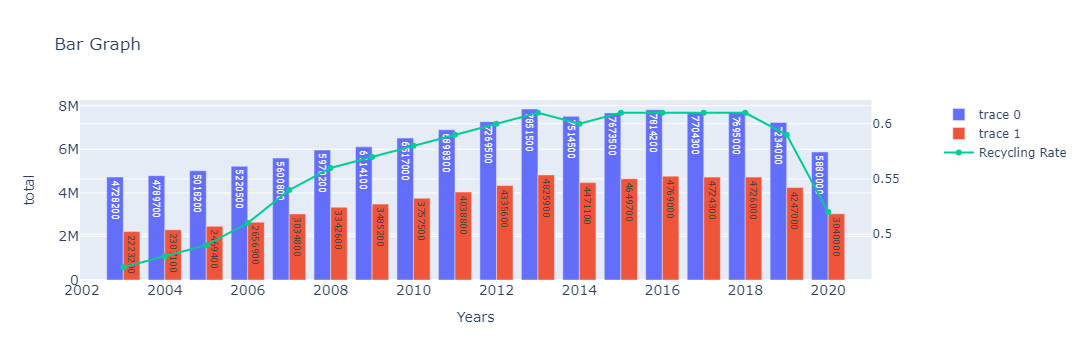

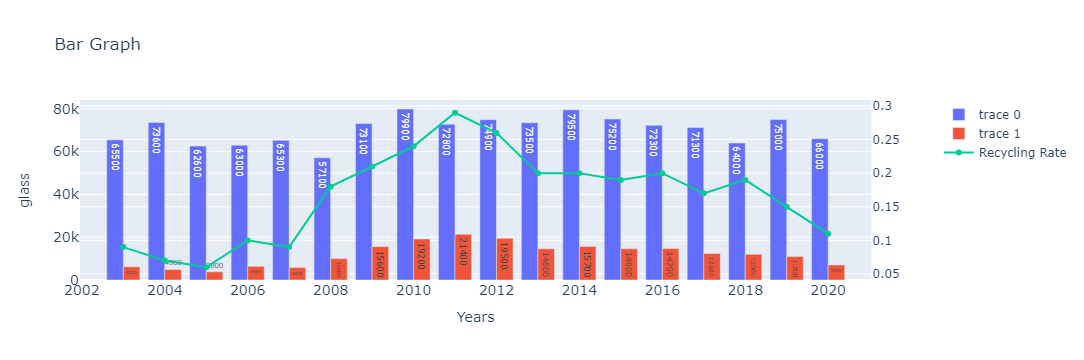

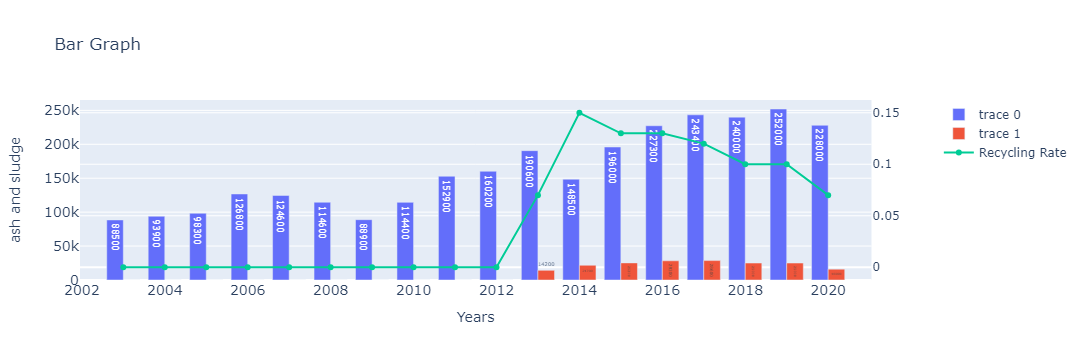

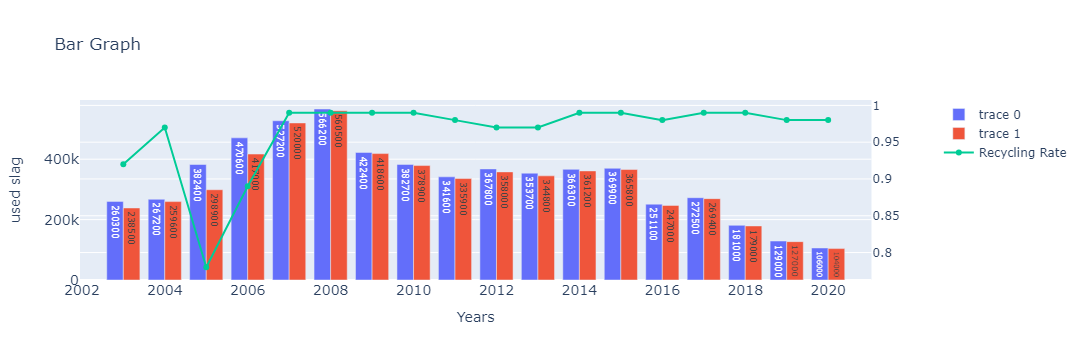

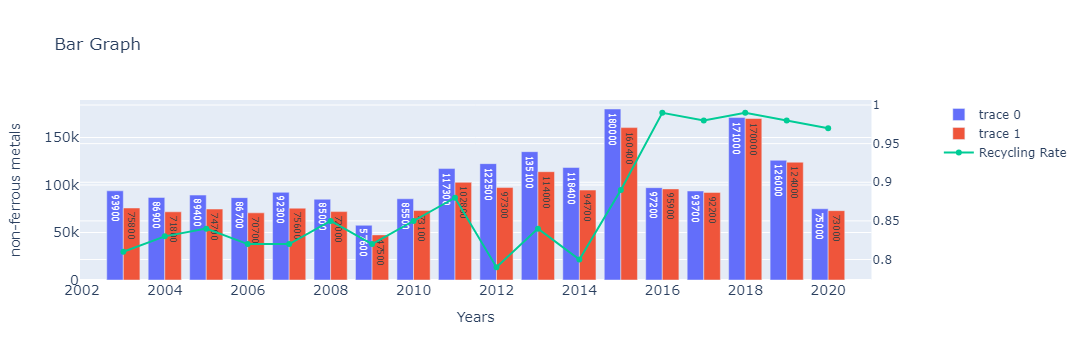

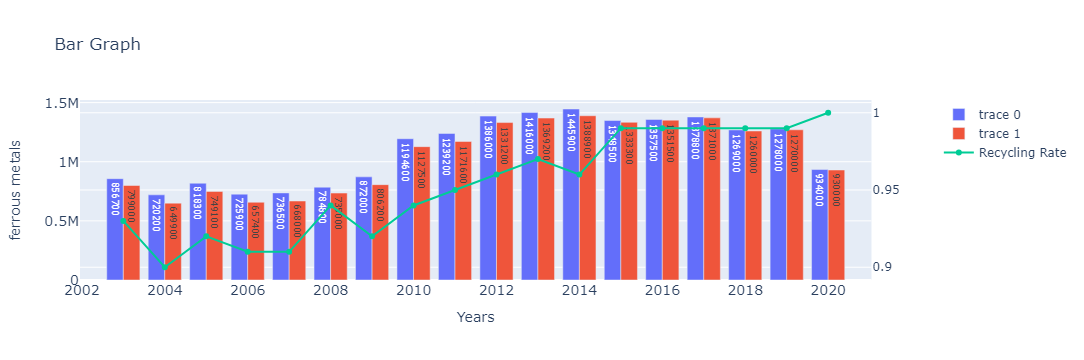

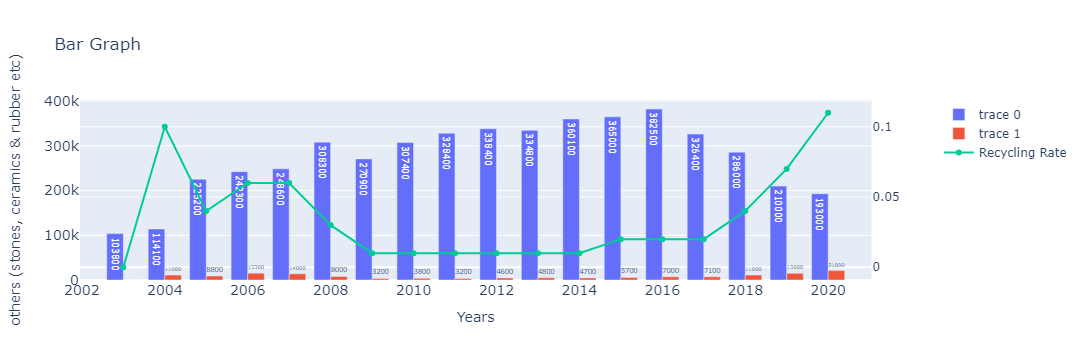

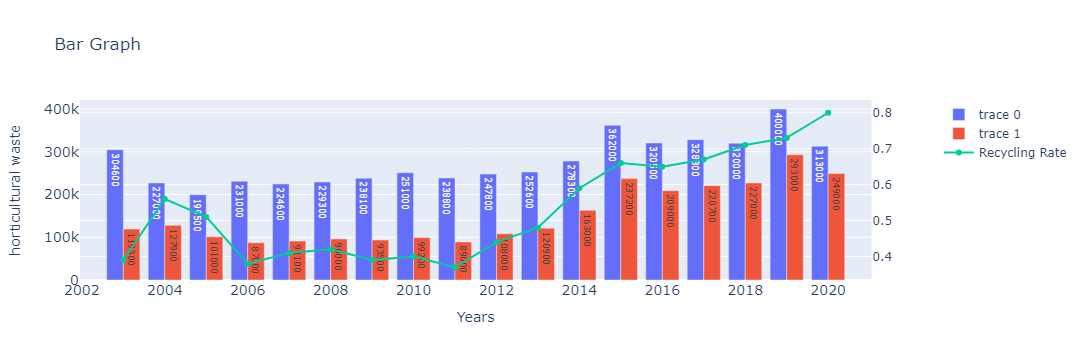

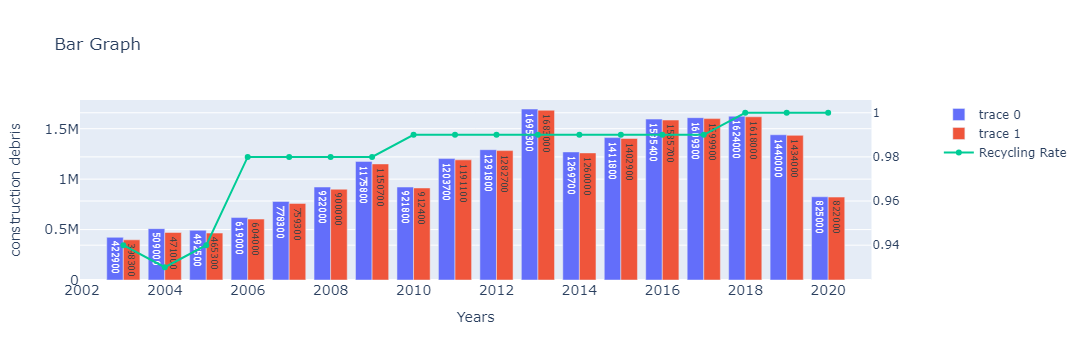

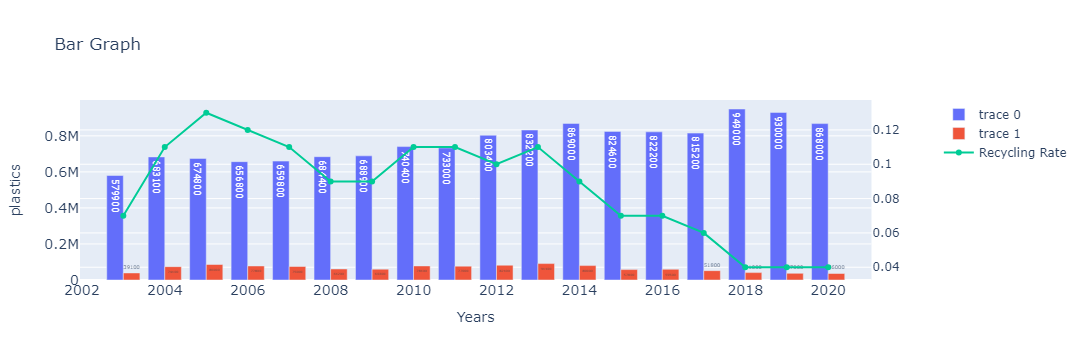

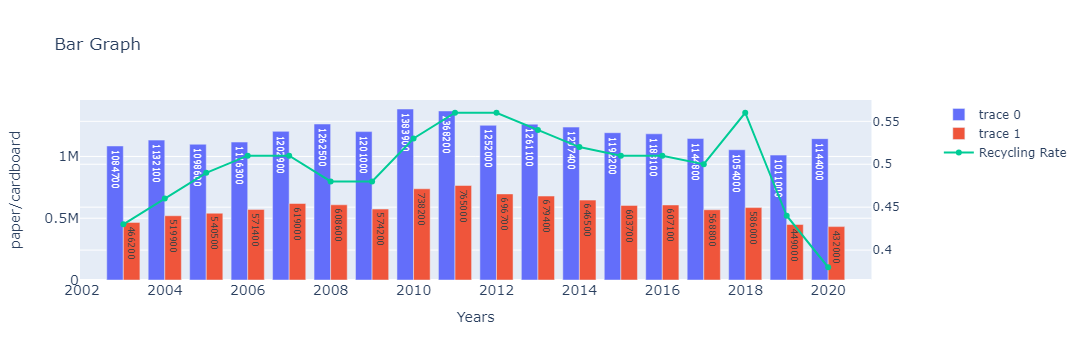

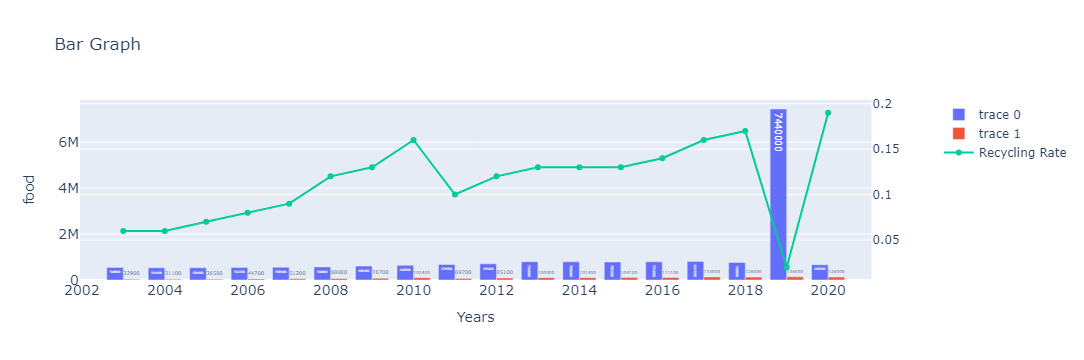

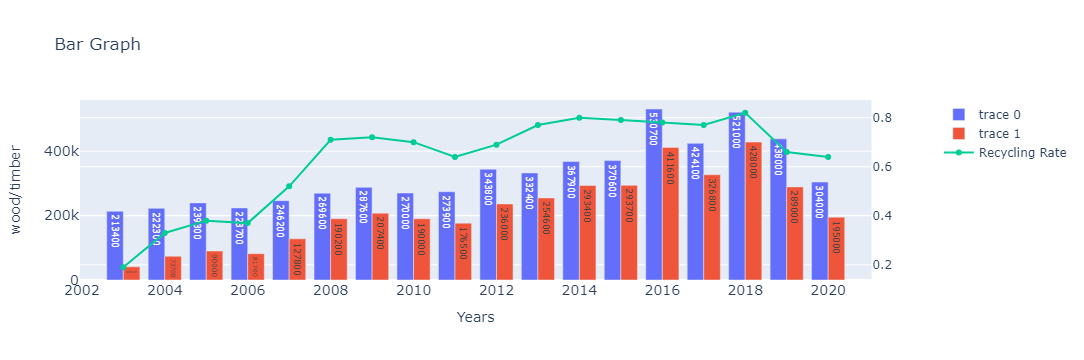

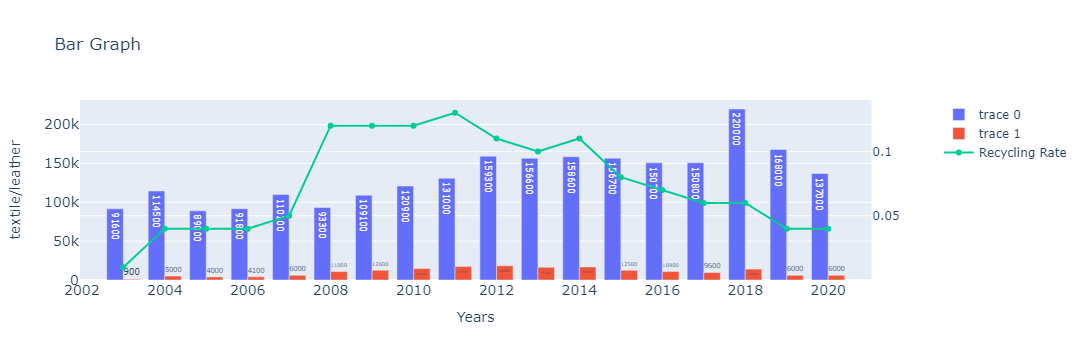

In [21]:
for waste_type in data['waste_type'].unique():
    waste_data = data[data['waste_type'] == waste_type]
    # print(waste_data)
    fig = go.Figure()
    
    fig= make_subplots(specs=[[{'secondary_y': True}]])

    fig.add_trace(
        go.Bar(
            x=waste_data['year'],
            y=waste_data['total_waste_generated_tonne'],
            text=waste_data['total_waste_generated_tonne'],
            textposition='auto',
        )
    )

    fig.add_trace(
        go.Bar(
            x=waste_data['year'],
            y=waste_data['total_waste_recycled_tonne'],
            text=waste_data['total_waste_recycled_tonne'],
            textposition='auto',
        )
    )
    
    # fig.add_trace(
    #     go.Bar(
    #         x=waste_data['year'],
    #         y=waste_data['recycling_rate'],
    #         text=waste_data['recycling_rate'],
    #         textposition='auto',
    #     )
    # )

    fig.add_trace(
        go.Line(
            x=waste_data['year'],
            y=waste_data['recycling_rate'],
            name='Recycling Rate',
        ),
        secondary_y=True
    )
    
    fig.update_layout(title_text=f"Bar Graph",
                     xaxis_tickfont_size=14,
                    yaxis=dict(
                        title=f'{waste_type}',
                        titlefont_size=14,
                        tickfont_size=14,
                    ),
                    xaxis=dict(
                        title='Years',
                        titlefont_size=14,
                        tickfont_size=14,
                    ))
    fig.show()

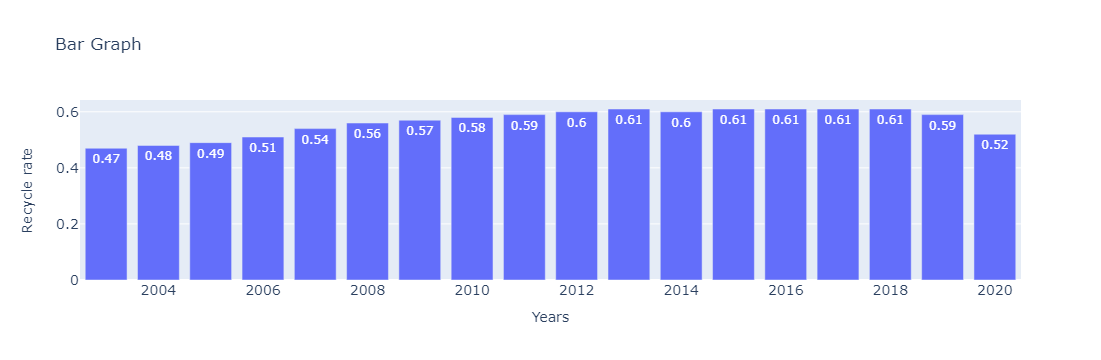

In [22]:
fig = go.Figure()

fig.add_trace(
    go.Bar(
        x=df_total['year'],
        y=df_total['recycling_rate'],
        text=df_total['recycling_rate'],
        textposition='auto',
    )
)
fig.update_layout(title_text=f"Bar Graph",
                 xaxis_tickfont_size=14,
                yaxis=dict(
                    title='Recycle rate',
                    titlefont_size=14,
                    tickfont_size=14,
                ),
                xaxis=dict(
                    title='Years',
                    titlefont_size=14,
                    tickfont_size=14,
                ))
fig.show()

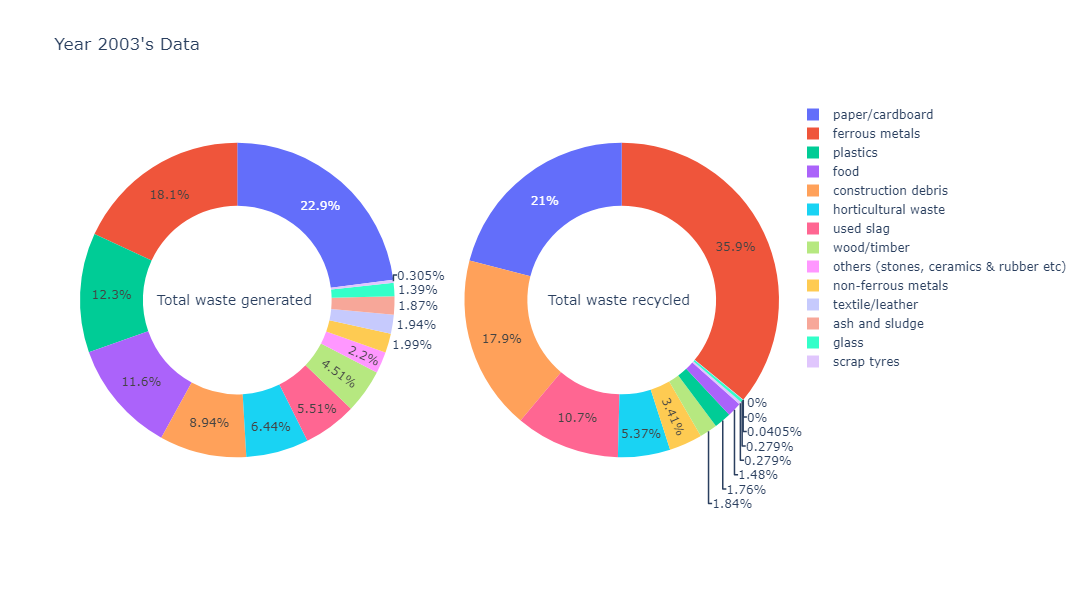

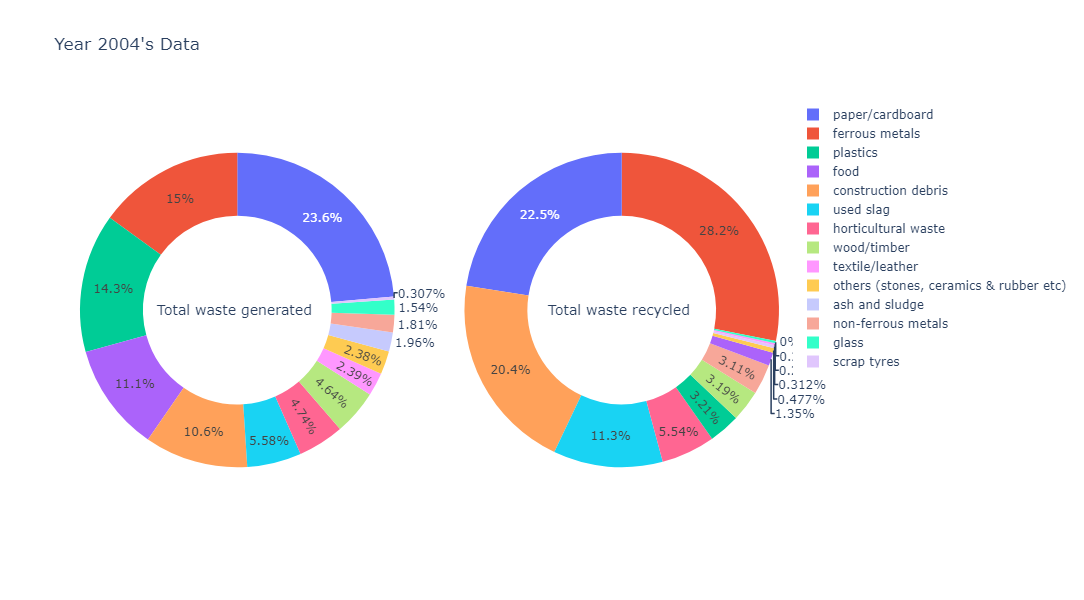

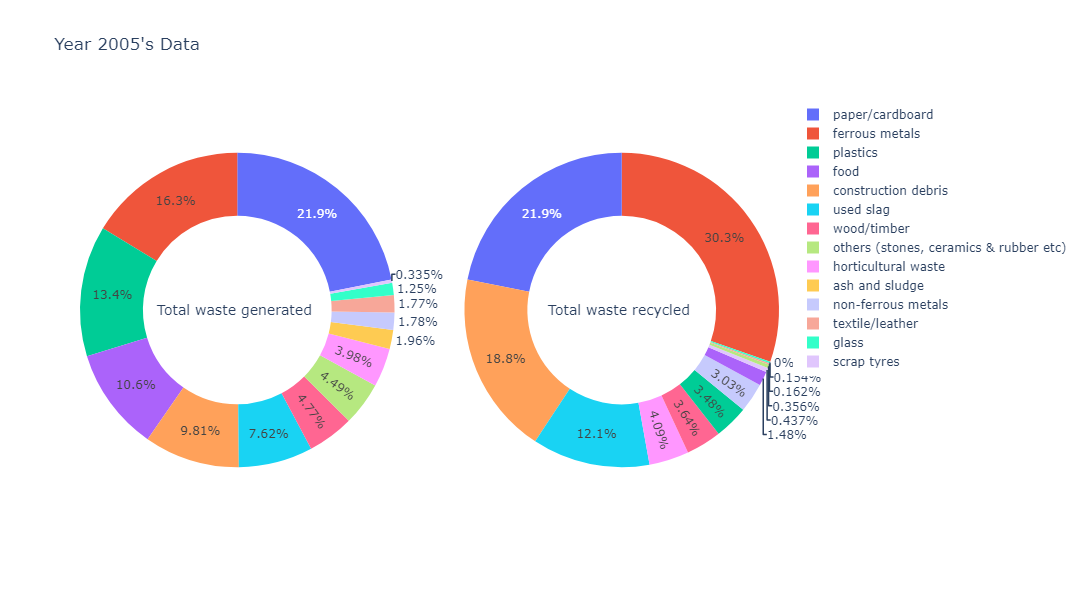

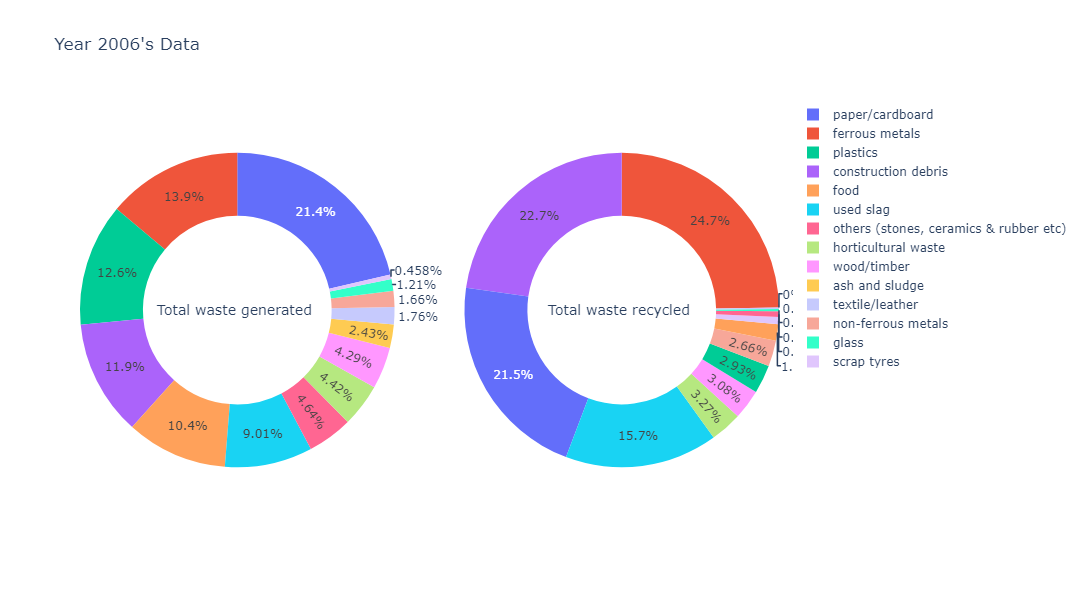

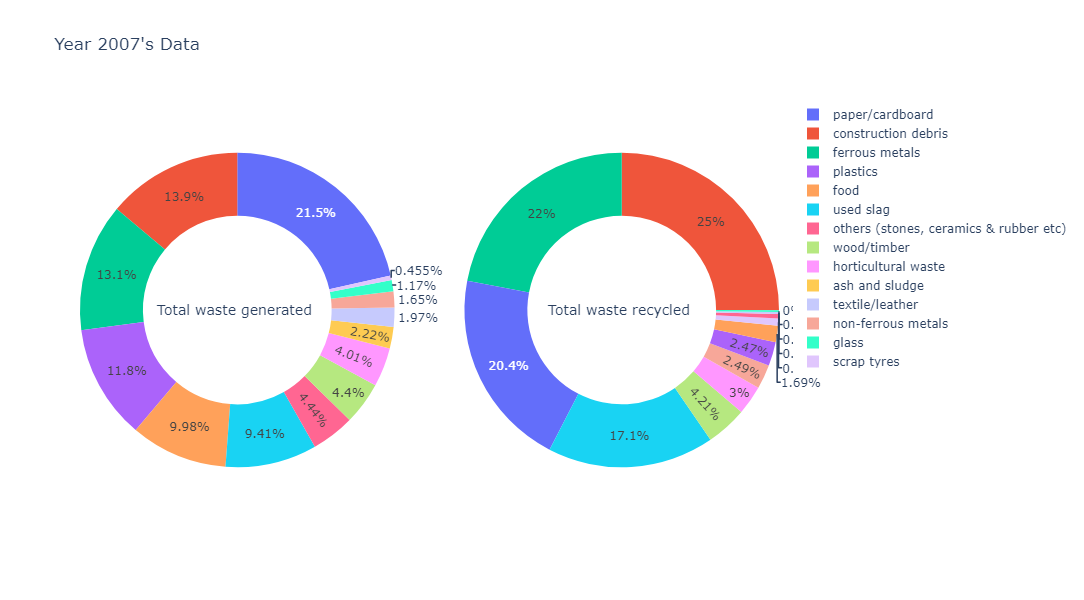

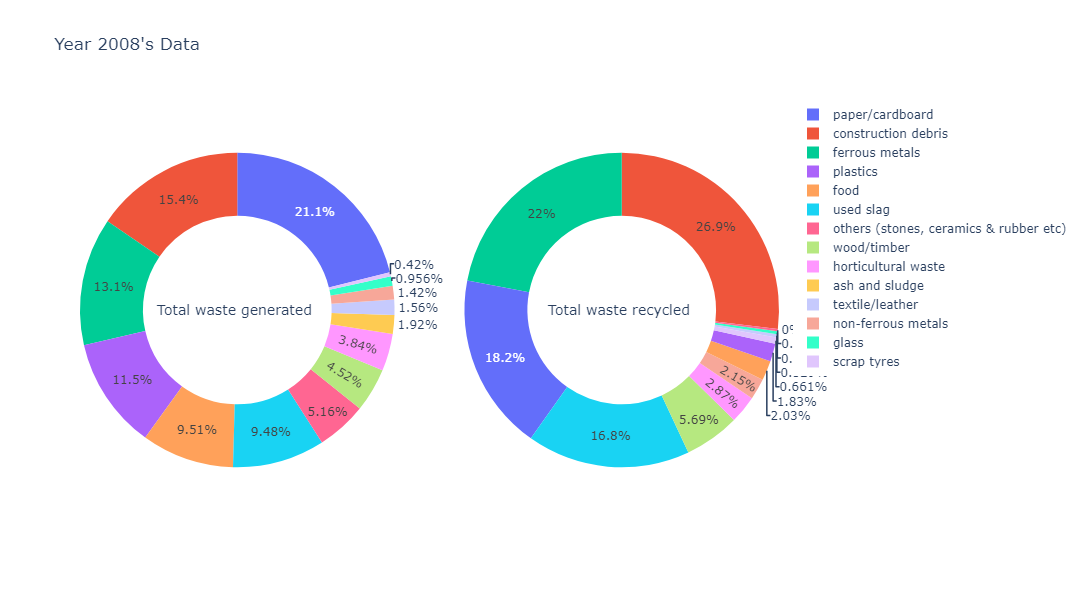

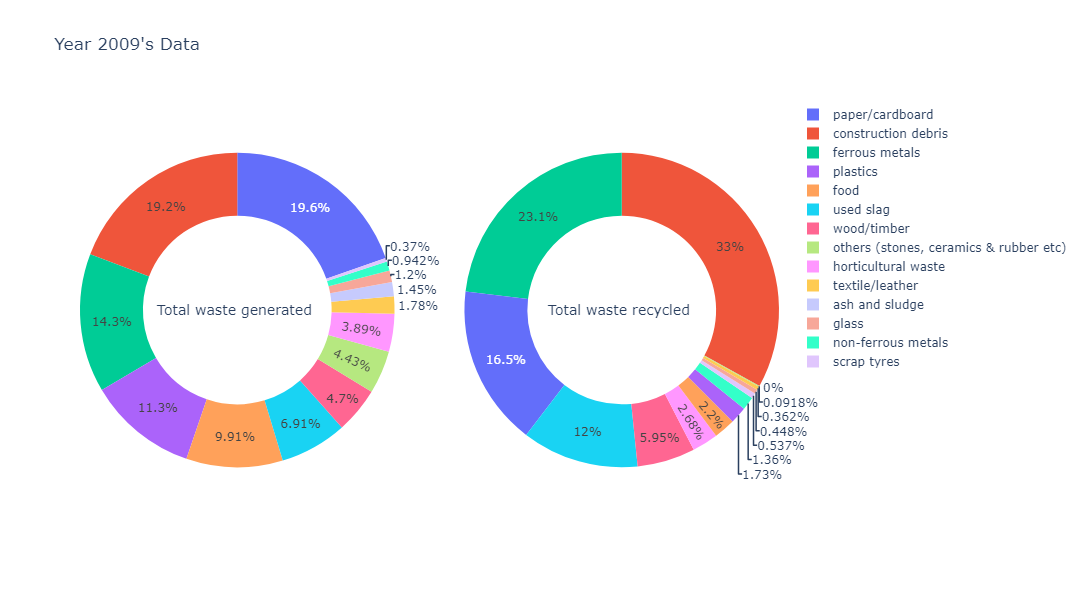

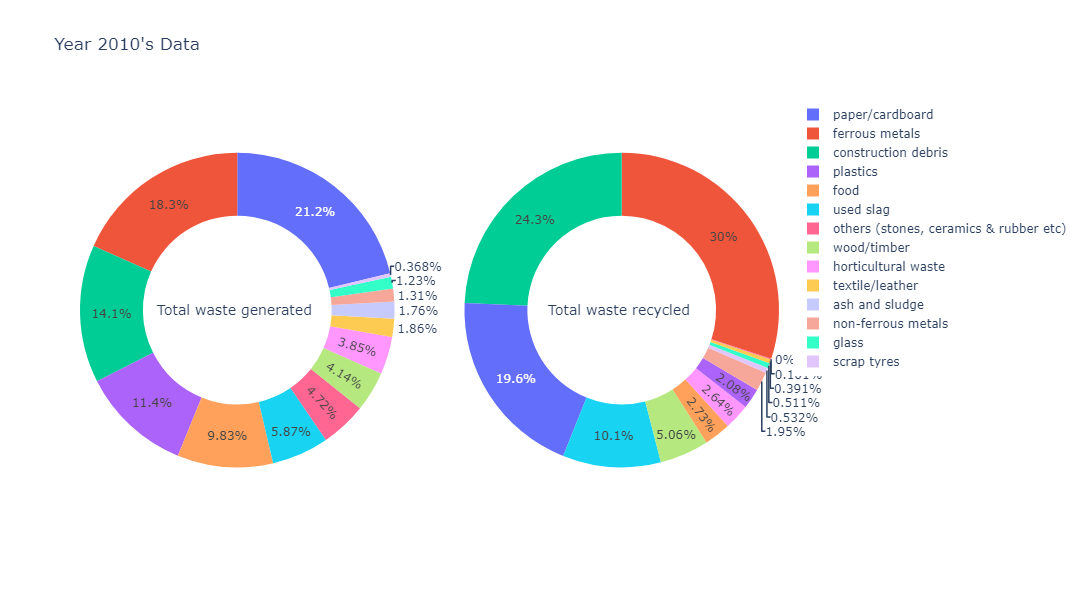

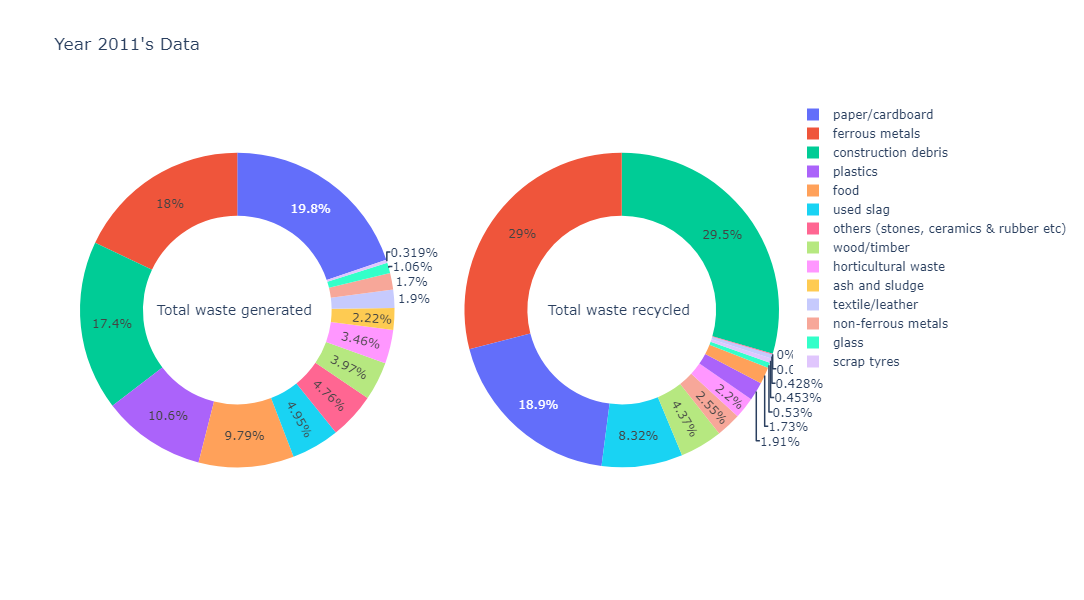

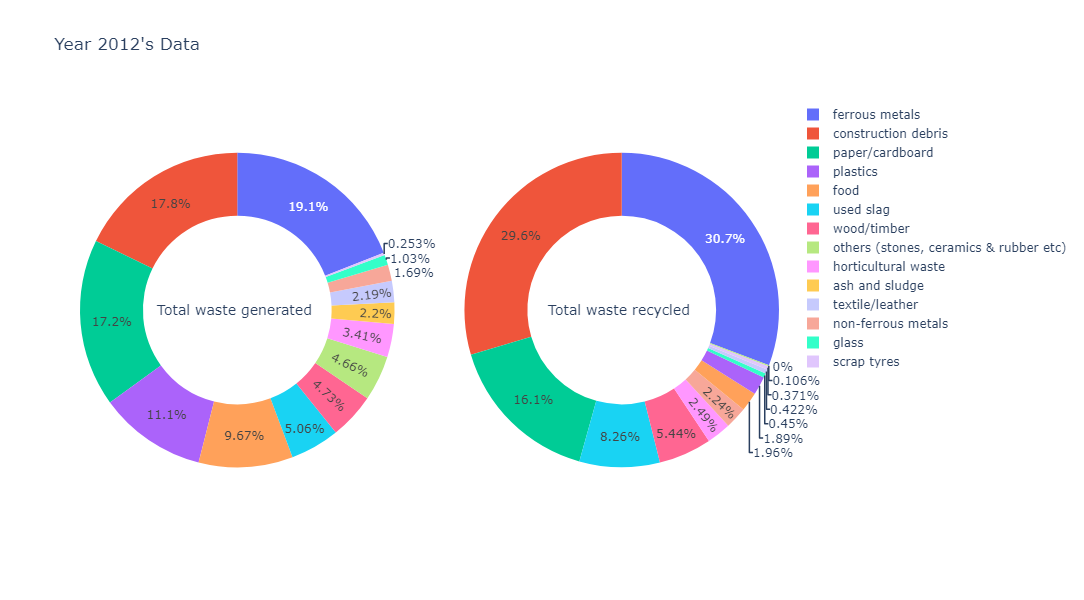

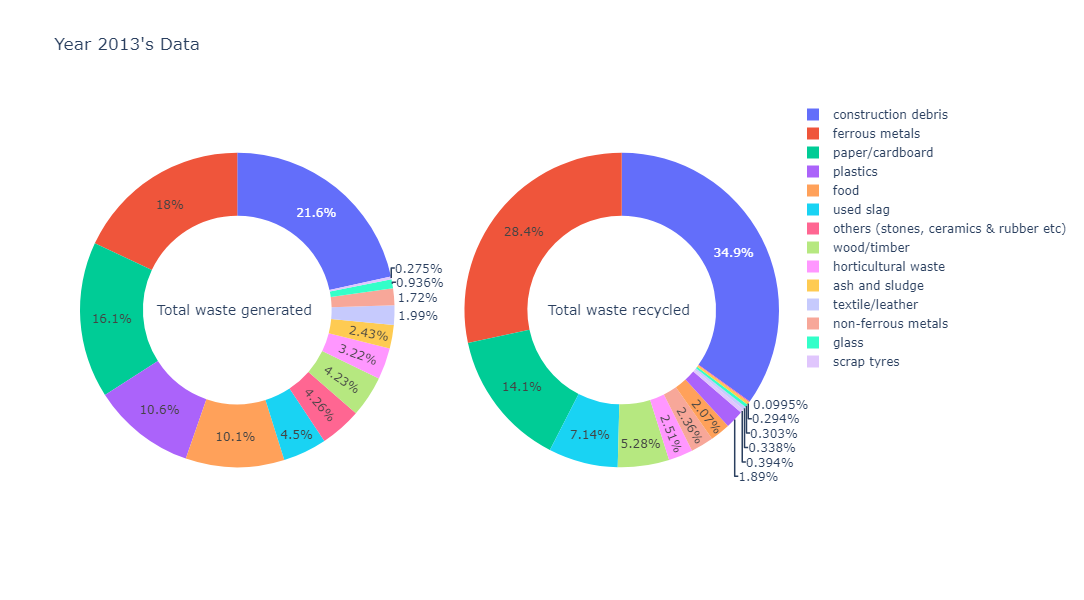

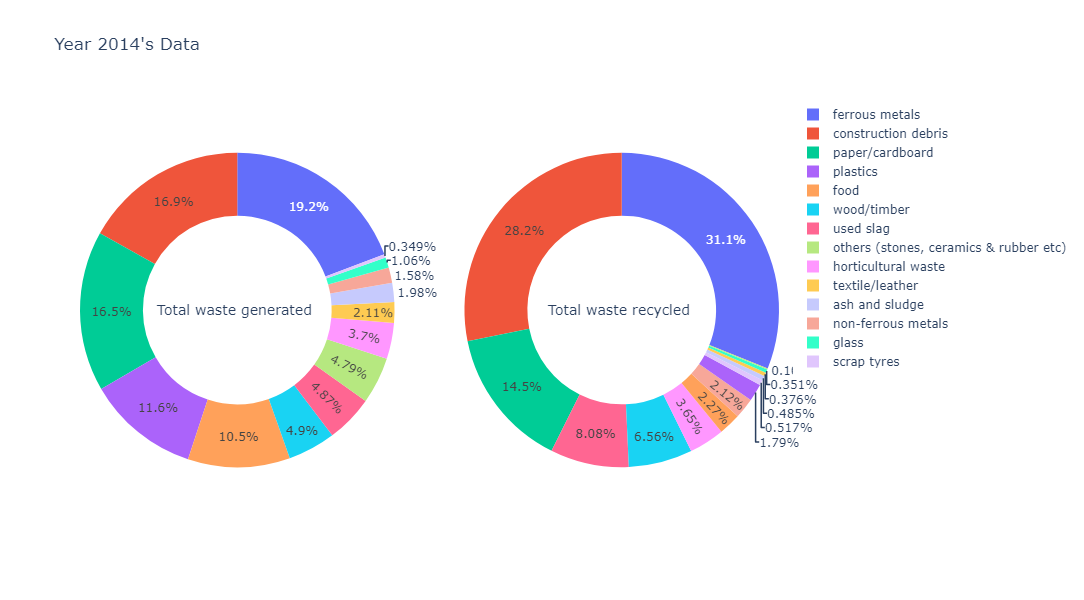

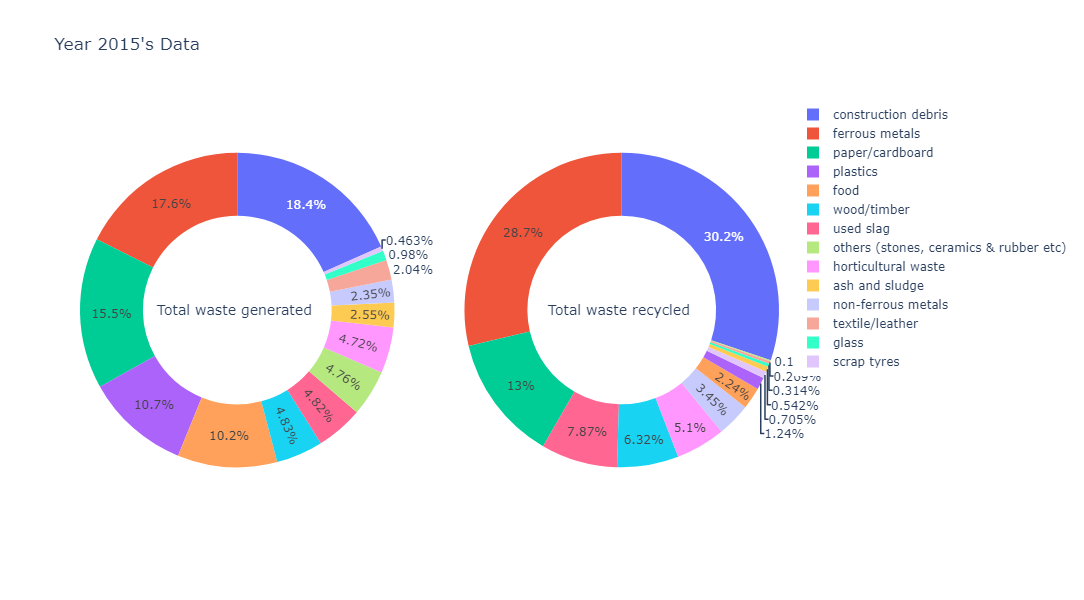

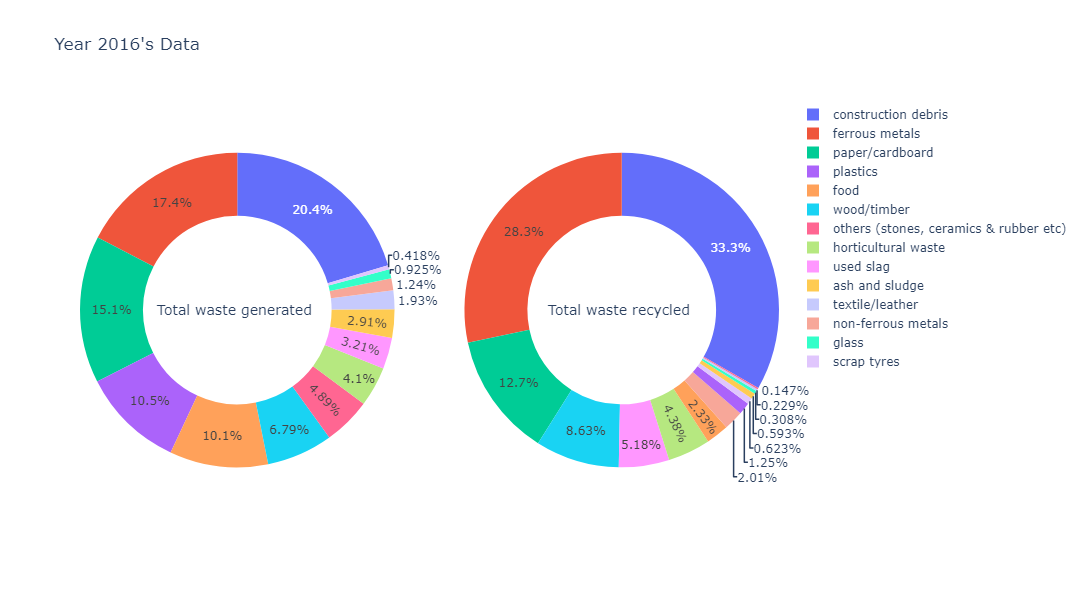

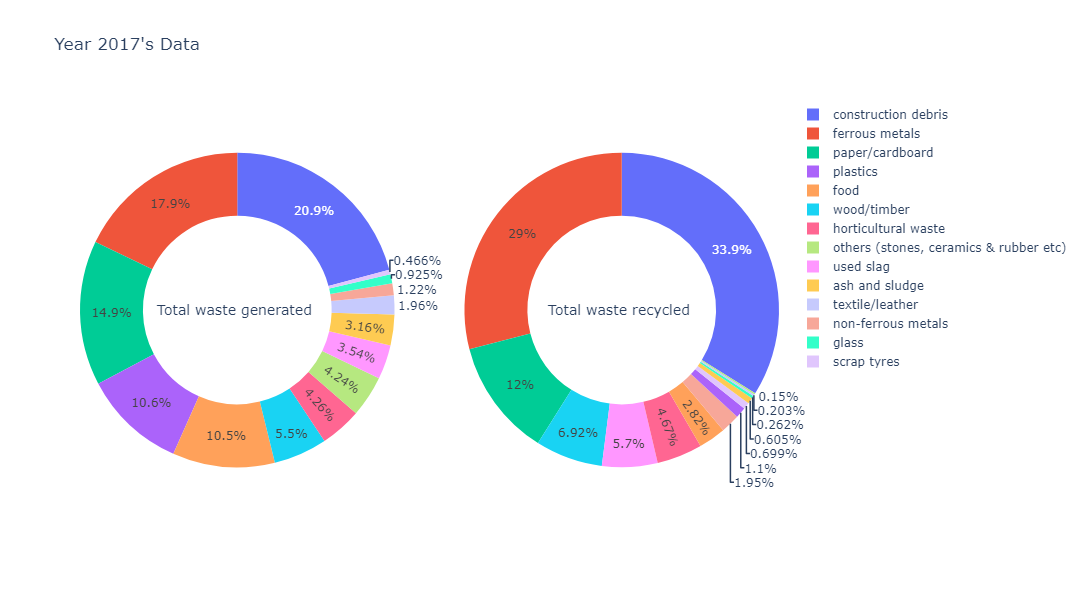

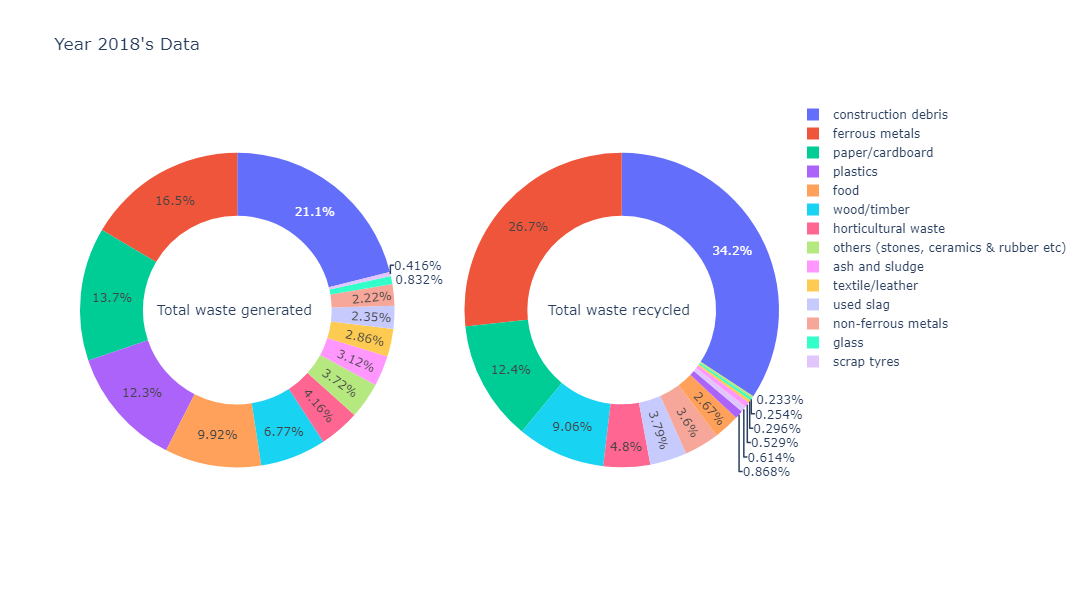

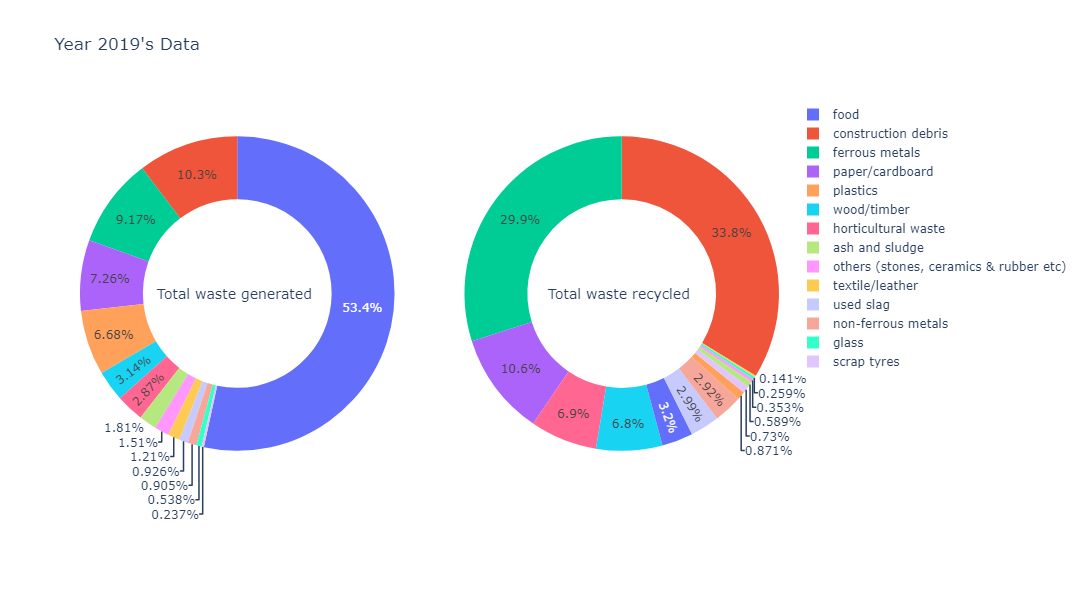

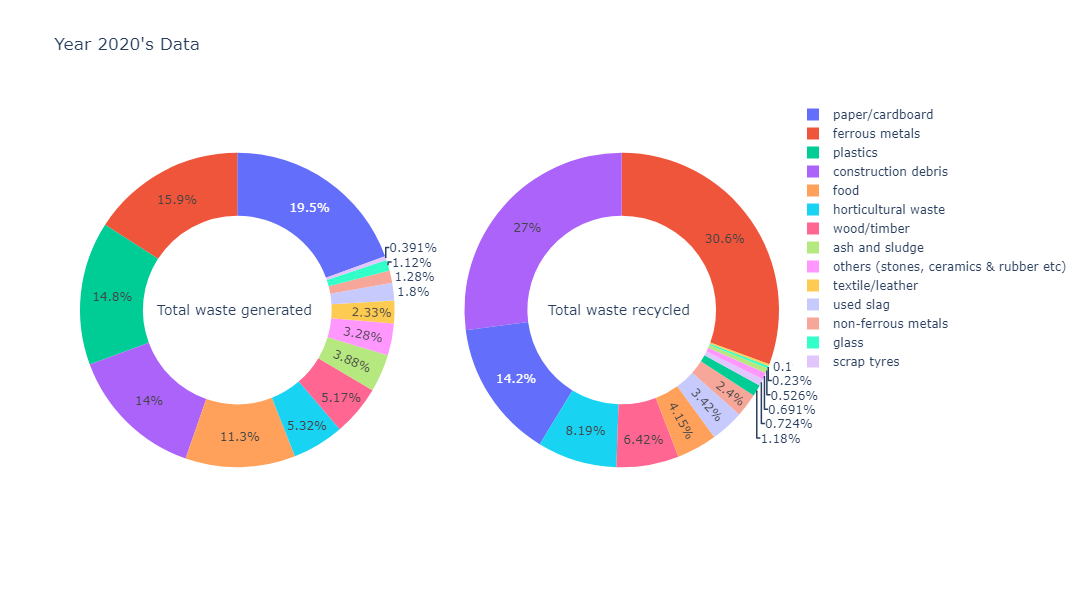

In [23]:
for year in data['year'].unique():
    year_data = data[data['year'] == year]

    # Values to ignore
    ignore_values = ["total"]

    # Query to ignore specific values
    filtered_df = year_data.query('waste_type not in @ignore_values')
    
    fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
    
    fig.add_trace(go.Pie(labels=filtered_df["waste_type"], values=filtered_df["total_waste_generated_tonne"], name="Total waste generated"),1, 1)
    fig.add_trace(go.Pie(labels=filtered_df["waste_type"], values=filtered_df["total_waste_recycled_tonne"], name="Total waste recycled"),1, 2)

    # Use `hole` to create a donut-like pie chart
    fig.update_traces(hole=.6, hoverinfo="label+percent+name")
    fig.update_layout(width=1000, height=600)
    
    fig.update_layout(
        title_text=f"Year {year}'s Data",
        # Add annotations in the center of the donut pies.
        annotations=[dict(text='Total waste generated', x=0.22, y=0.5, font_size=14, showarrow=False, xanchor='center', yanchor='middle', textangle=0),
                 dict(text='Total waste recycled', x=0.77, y=0.5, font_size=14, showarrow=False, xanchor='center', yanchor='middle', textangle=0)])
    
    fig.show()